<a href="https://colab.research.google.com/github/shivpandey2406/Machine-Learning-Project/blob/main/Bootstrap_Aggregation_(Bagging).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import the necessary module
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [44]:
data = datasets.load_wine(as_frame= True )
#data
X = data.data
y = data.target

In [45]:
# Splitting the data into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state= 22)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560.0
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0


In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
# Fitting the model as DecisionTree Classifier

clf = DecisionTreeClassifier(random_state= 22,criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1, class_weight=None)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=22)

In [48]:
# predict the result of test set
y_pred = clf.predict(X_test)
y_pred

array([1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       2])

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  1,  0],
       [ 3, 13,  1],
       [ 0,  2, 13]])

In [50]:
accuracy = accuracy_score(y_train,y_pred= clf.predict(X_train))
accuracy

1.0

In [51]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8444444444444444

## Creating a Bagging Classifier
For bagging we need to set the parameter n_estimators, this is the number of base classifiers that our model is going to aggregate together.

In [53]:
from sklearn.ensemble import BaggingClassifier

# Now lets create a range of values that represent the number of estimators we want to use in each ensemble
estimator_range = [2,4,6,8,10,12,14]

# To see how the Bagging Classifier performs with different values of n_estimators we need a way to iterate over the range of values and store the results from each ensemble. To do this we will create a for loop, storing the models and scores in separate lists for later vizualizations.

In [54]:
models = []
scores = []
for n_estimators in estimator_range:
  # create bagging classifier
  clf1 = BaggingClassifier(n_estimators= n_estimators,random_state= 22)
 # fit the model
  clf1.fit(X_train,y_train)


In [55]:
# Append the model and score to their respective list
models.append(clf1)
scores.append(accuracy_score(y_true= y_test,y_pred=clf1.predict(X_test)))
models


[BaggingClassifier(n_estimators=14, random_state=22)]

In [56]:
scores

[0.9555555555555556]

# Consolidate all above three part in one the run it

In [57]:
models = []
scores = []
for n_estimators in estimator_range:
  # create bagging classifier
  clf1 = BaggingClassifier(n_estimators= n_estimators,random_state= 22)
  # fit the model
  clf1.fit(X_train,y_train)
  # Append the model and score to their respective list # This code was not in the loop
  models.append(clf1)
  scores.append(accuracy_score(y_true= y_test,y_pred=clf1.predict(X_test)))



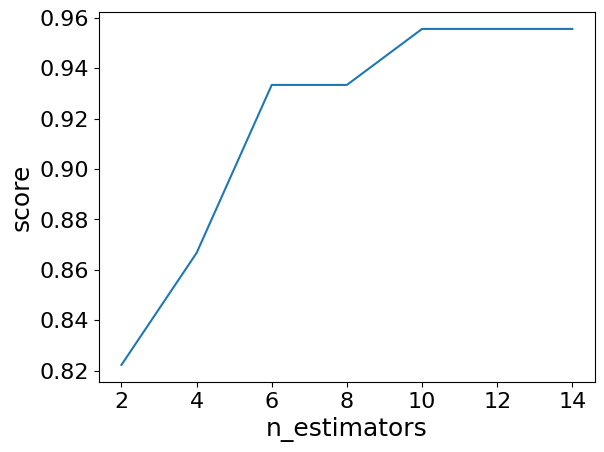

In [58]:
# With the help of models and scores stored we can now visualize the improvement in model performance
import  matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.Figure(figsize= (9,6))
plt.plot(estimator_range,scores)

# Adjust labels and font (to make visable)
plt.xlabel ("n_estimators", fontsize= 18)
plt.ylabel("score", fontsize= 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

# Result Explain
By iterating through different values for the number of estimators we can see an increase in model performance from 82.2% to 95.5%.
Again if we want to set a different random_state the values we see will vary.

So these 12 estimators yielded the highest accuracy, so we will use that to create our model.